# Extract peaks by hands

Chosen by hand

In [10]:
import numpy as np

bounds_mob_rt = np.array([
    [0.985, 1.005, 9.68, 9.78],
    [0.987, 1.04, 9.9, 10.0],
    [1.2, 1.244, 16.6, 16.9],
    [1.236, 1.267, 16.98, 17.1],
    [1.237, 1.27, 17.18, 17.34],
    [1.348, 1.378, 8.25, 8.35],
    [1.36, 1.382, 8.39, 8.6],
    [1.31, 1.355, 5.18, 5.29],
    [1.312, 1.35, 5.87, 5.97],
    [1.26, 1.297, 5.45, 5.7],
    [1.2, 1.4, 5.3, 5.9]
])

bounds_mz_rt = np.array([
    [1130.0, 1145.0, 8.68, 8.9], # maybe it's an index, not a value -> Use Integer if so
    [1100.0, 1120.0, 9.18, 9.375],
    [1080.0, 1095.0, 9.27, 9.77],
    [620.0, 635.0, 8.15, 8.25],
    [635.0, 665.0, 8.275, 8.44],
    [625.0, 640.0, 8.5, 8.65],
    [620.0, 635.0, 8.67, 8.77],
    [575.0, 590.0, 15.9, 16.18],
    [545.0, 555.0, 15.925, 16.07],
    [535.0, 545.0, 15.975, 16.22]
])

Read data

In [11]:
import alphatims.utils
import alphatims.bruker
import alphatims.plotting
import pandas as pd

# Load data
bruker_d_folder_name = "../Datasets/Alphatims-Testdata/testdata.d"
data = alphatims.bruker.TimsTOF(bruker_d_folder_name)

### Save different peak regions in Dictionary

RT with MZ

In [12]:
from matplotlib.cm import get_cmap

df = data[
    {
        "precursor_indices": 0,
    }
]

n_levels = 512

cmap = get_cmap("gray", n_levels)

heatmap = alphatims.plotting.heatmap(
    df,
    x_axis_label="rt",
    y_axis_label="mz",
    title=data.sample_name,
    width=900,
    cmap = cmap,
    #colorbar=True, # hat nur Werte zwischen 0 und 1
)
#hv.save(heatmap, "tutorial_heatmap.html")
#heatmap_df = pd.DataFrame(heatmap.dframe())
heatmap

/tmp/ipykernel_364165/3246606539.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("gray", n_levels)


BokehModel(combine_events=True, render_bundle={'docs_json': {'76d56550-084e-40e0-bb13-11e80e4e1fb6': {'version…

In [13]:
heatmap_df = heatmap.dframe()

print(heatmap_df.head())
print(heatmap_df.shape)

# R=G=B=A => jeder Wert ist height
heatmap_df['height'] = heatmap_df['R']
heatmap_df.drop(columns=['R','G','B','A'], inplace=True)

# Umrechnen
fractions = heatmap_df.height / np.max(heatmap_df['height']) # Normalisierung auf 0-1
#vmin, vmax = df.intensity_values.values.min(), df.intensity_values.values.max() # Stimmt nicht so ganz, weil man eigentlich die Intensität der Randverteilung bräuchte. Ist aber nur Skalierung
#height_arr = vmin + fractions * (vmax - vmin)
#height_arr = fractions # alle Zahlen zwischen 0 und 1
heatmap_df['height'] = fractions

# Heatmap_df has columns: rt_values_min, mz_values, height


# Speichern der Beispiele
mz_rt_examples = {}

for i in range(bounds_mz_rt.shape[0]):

    # Get the bounds
    mz_lower = bounds_mz_rt[i, 0] #- 3e1
    mz_upper = bounds_mz_rt[i, 1] #+ 3e1
    rt_lower = bounds_mz_rt[i, 2] #- 1e-2
    rt_upper = bounds_mz_rt[i, 3] #+ 1e-2
    # Filtern
    filtered_df = heatmap_df.query(
        "@mz_lower <= mz_values <= @mz_upper and "
        "@rt_lower <= rt_values_min <= @rt_upper"
        )   
    #print(filtered_df.shape)

    # Pivotieren
    pivot = filtered_df.pivot(
        index='mz_values',
        columns='rt_values_min',
        values='height'   
    )
    height_arr = pivot.values  # 2D-NumPy-Array

    print(pivot.shape)

    # store result in data frame
    example_dict = {
        'df': filtered_df,
        'image': height_arr,
        'pivot': pivot,
    }
    exec(f"mz_rt_examples[{i}] = example_dict")
        

   rt_values_min   mz_values    R    G    B    A
0       0.021077  102.501560  181  181  181  255
1       0.021077  107.501515  139  139  139  255
2       0.021077  112.501469  236  236  236  255
3       0.021077  117.501423    0    0    0    0
4       0.021077  122.501377  244  244  244  255
(288000, 6)
(3, 10)
(4, 8)
(3, 21)
(3, 4)
(6, 7)
(3, 6)
(3, 4)
(3, 12)
(2, 6)
(2, 11)


RT with Mobility

In [14]:
from matplotlib.cm import get_cmap

df = data[
    {
        "precursor_indices": 0,
    }
]

n_levels = 512

cmap = get_cmap("gray", n_levels)

heatmap = alphatims.plotting.heatmap(
    df,
    x_axis_label="rt",
    y_axis_label="mobility",
    title=data.sample_name,
    width=900,
    cmap = cmap,
    #colorbar=True, # hat nur Werte zwischen 0 und 1
)
#hv.save(heatmap, "tutorial_heatmap.html")
heatmap

/tmp/ipykernel_364165/1454655803.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("gray", n_levels)


BokehModel(combine_events=True, render_bundle={'docs_json': {'bca97e78-07ce-4ba4-af1c-5b00c4ce76b9': {'version…

In [15]:
heatmap_df = heatmap.dframe()

print(heatmap_df.head())
print(heatmap_df.shape)

# R=G=B=A => jeder Wert ist height
heatmap_df['height'] = heatmap_df['R']
heatmap_df.drop(columns=['R','G','B','A'], inplace=True)

# Umrechnen
fractions = heatmap_df.height / np.max(heatmap_df['height'])
#vmin, vmax = df.intensity_values.values.min(), df.intensity_values.values.max() # Stimmt nicht so ganz, weil man eigentlich die Intensität der Randverteilung bräuchte. Ist aber nur Skalierung
#height_arr = vmin + fractions * (vmax - vmin)
height_arr = fractions # alle Zahlen zwischen 0 und 1
heatmap_df['height'] = height_arr

# Speichern der Beispiele
mob_rt_examples = {}

for i in range(bounds_mob_rt.shape[0]):

    # Get the bounds
    mob_lower = bounds_mob_rt[i, 0] #- 1e-3
    mob_upper = bounds_mob_rt[i, 1] #+ 1e-3
    rt_lower = bounds_mob_rt[i, 2] - 1e-2
    rt_upper = bounds_mob_rt[i, 3] + 1e-2
    # Filtern
    filtered_df = heatmap_df.query(
        "@mob_lower <= mobility_values <= @mob_upper and "
        "@rt_lower <= rt_values_min <= @rt_upper"
        )   
    #print(filtered_df.shape)

    # Pivotieren
    pivot = filtered_df.pivot(
        index='mobility_values',
        columns='rt_values_min',
        values='height'  
    )
    height_arr = pivot.values  # 2D-NumPy-Array

    print(pivot.shape)

    # store result in data frame
    example_dict = {
        'df': filtered_df,
        'image': height_arr,
        'pivot': pivot,
    }
    exec(f"mob_rt_examples[{i}] = example_dict")
        

   rt_values_min  mobility_values    R    G    B    A
0       0.021077         0.603659    0    0    0    0
1       0.021077         0.606666  237  237  237  255
2       0.021077         0.609673  235  235  235  255
3       0.021077         0.612680    0    0    0    0
4       0.021077         0.615687    0    0    0    0
(288000, 6)
(7, 5)
(18, 5)
(14, 14)
(10, 6)
(11, 8)
(10, 5)
(7, 9)
(15, 6)
(13, 5)
(12, 11)
(66, 27)


       rt_values_min  mobility_values    height
72519       5.295898         1.202079  0.454902
72520       5.295898         1.205087  0.549020
72521       5.295898         1.208094  0.552941
72522       5.295898         1.211101  0.501961
72523       5.295898         1.214108  0.427451


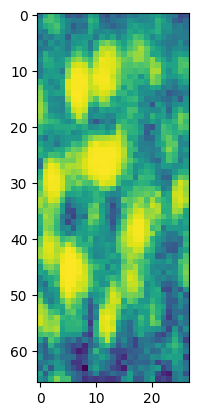

In [7]:
import matplotlib.pyplot as plt

i = 10

# Plot
plt.imshow(mob_rt_examples[i]['image'], cmap='viridis')

# Print the example
#print(mz_rt_examples[1]['df'].head())
#print(mz_rt_examples[1]['df'].shape)
print(mob_rt_examples[i]['df'].head())

In [8]:
print("Minimum: ", mob_rt_examples[i]['pivot'].min().min())
print("Maximum: ", mob_rt_examples[i]['pivot'].max().max())

Minimum:  0.10588235294117647
Maximum:  0.996078431372549


### Modelfit

#### Johnson $S_u$

In [9]:
import numpy as np
import tensorflow as tf

# --- 1. Datenvorbereitung ---
# Hol dir deine Peak-Region und baue daraus NumPy-Arrays
peak_region = 9

df = mob_rt_examples[peak_region]['df']

# X: (N_samples, 3), Y: (N_samples,)
X_np = df[['rt_values_min', 'mobility_values']].values.astype(np.float32)
Y_np = df['height'].values.astype(np.float32)
sum_intensities = np.sum(Y_np**2)

# In TensorFlow konvertieren
X = tf.constant(X_np)                  # shape [N, 2] <- (rt_values_min, mobility_values) for all N samples
Y = tf.constant(Y_np)                  # shape [N] 

2025-05-30 09:32:07.987808: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-30 09:32:09.182298: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-30 09:32:09.734207: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-30 09:32:13.313418: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvi

In [ ]:
# --- 2. Parameter als trainierbare Variablen ---
dimensions = 2
number_parameters = dimensions ** 2 + 3*dimensions + 1
params = tf.Variable(tf.random.normal([number_parameters], stddev=0.1), name="params")

# --- 3. Modell- und Fehlerfunktion definieren ---
def jsu_likelihood(params, X):
    
    # parameter length
    n = int(-3/2+ np.sqrt(5/4 + len(params.numpy())))
    # 0: alpha
    alpha = params[0]
    # gamma
    gamma = params[1:1+n]
    # zeta
    zeta = params[1+n:1+2*n]
    # delta (absolut)
    delta = tf.nn.softplus(params[1+2*n:1+3*n])
    # A-Matrix (3×3), Q = A·Aᵀ
    A = tf.reshape(params[1+3*n:], (n, n))
    #Q = tf.matmul(A, A, transpose_b=True)  # Q = A @ A.T

    # Achsentransformation: für jeden Sample-Vektor x: Q @ (x - zeta)
    centered = X - zeta                   # broadcast [N,2] - [2] → [N,2]
    transformed = tf.matmul(centered, A, transpose_b=True)  # [N,2]

    # Komponentendichten
    # rho_i = exp(-0.5*(γ_i + δ_i*asinh(t_i))²) / sqrt(1 + t_i²)
    asinh_t = tf.asinh(transformed)      # [N,2]
    exponent = -0.5 * (gamma + delta * asinh_t)**2  # broadcast [2]→[N,2]
    rho_components = tf.exp(exponent) / tf.sqrt(1 + transformed**2)  # [N,2]

    # Gesamt-Wahrscheinlichkeit: α * ∏ₖ ρₖ
    rho = alpha * tf.reduce_prod(rho_components, axis=1)  # [N]
    return rho

def loss_fn(params):
    rho = jsu_likelihood(params, X)        # Vorhersagen [N]
    # mittlere quadratische Abweichung, normalisiert durch Summe aller Intensitäten
    mse = tf.reduce_sum((Y - rho)**2) / sum_intensities
    return mse

# --- 4. Optimizer und Trainingsschleife ---
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)

# Anzahl der Iterationen / Epochen
epochs = 100000

old_loss = np.inf
opt_params = None

for epoch in range(epochs):
    with tf.GradientTape() as tape:
        loss = loss_fn(params)
    grads = tape.gradient(loss, [params])
    optimizer.apply_gradients(zip(grads, [params]))

    if loss.numpy() < old_loss:
        # Speichere die besten Parameter und den besten Verlust
        old_loss = loss.numpy()
        opt_params = params.numpy()

    if epoch % 200 == 0:
        print(f"Epoch {epoch:4d}, Loss = {loss.numpy():.6e}, Best Loss = {old_loss:.6e}")

# --- 5. Ergebnisse ausgeben ---
print("Optimierte Parameter:", opt_params)
alpha_opt = opt_params[0]
print("Alpha:", alpha_opt)
gamma_opt = opt_params[1:1+dimensions]
print("Gamma:", gamma_opt)
zeta_opt = opt_params[1+dimensions:1+2*dimensions]
print("Zeta:", zeta_opt)
delta_opt = np.abs(opt_params[1+2*dimensions:1+3*dimensions])
print("Delta:", delta_opt)
A_opt = np.reshape(opt_params[1+3*dimensions:], (dimensions, dimensions))
print("A-Matrix:", A_opt)
opt_loss = loss_fn(tf.convert_to_tensor(opt_params, dtype=tf.float32)).numpy()
print("Finaler Fehler:", opt_loss)


Epoch    0, Loss = 9.297497e-01, Best Loss = 9.297497e-01
Epoch  200, Loss = 3.389999e-02, Best Loss = 3.389999e-02
Epoch  400, Loss = 3.385503e-02, Best Loss = 3.385503e-02
Epoch  600, Loss = 3.377606e-02, Best Loss = 3.377606e-02
Epoch  800, Loss = 3.359463e-02, Best Loss = 3.359463e-02
Epoch 1000, Loss = 3.243479e-02, Best Loss = 3.234004e-02
Epoch 1200, Loss = 3.144234e-02, Best Loss = 3.144234e-02
Epoch 1400, Loss = 3.091664e-02, Best Loss = 3.091664e-02
Epoch 1600, Loss = 3.077518e-02, Best Loss = 3.077518e-02
Epoch 1800, Loss = 3.056882e-02, Best Loss = 3.056882e-02
Epoch 2000, Loss = 3.009263e-02, Best Loss = 3.009263e-02
Epoch 2200, Loss = 2.892858e-02, Best Loss = 2.890185e-02
Epoch 2400, Loss = 2.728227e-02, Best Loss = 2.721062e-02
Epoch 2600, Loss = 2.661651e-02, Best Loss = 2.651048e-02
Epoch 2800, Loss = 2.632825e-02, Best Loss = 2.631919e-02
Epoch 3000, Loss = 2.621780e-02, Best Loss = 2.621780e-02
Epoch 3200, Loss = 2.613998e-02, Best Loss = 2.613998e-02
Epoch 3400, Lo

Visualisierung

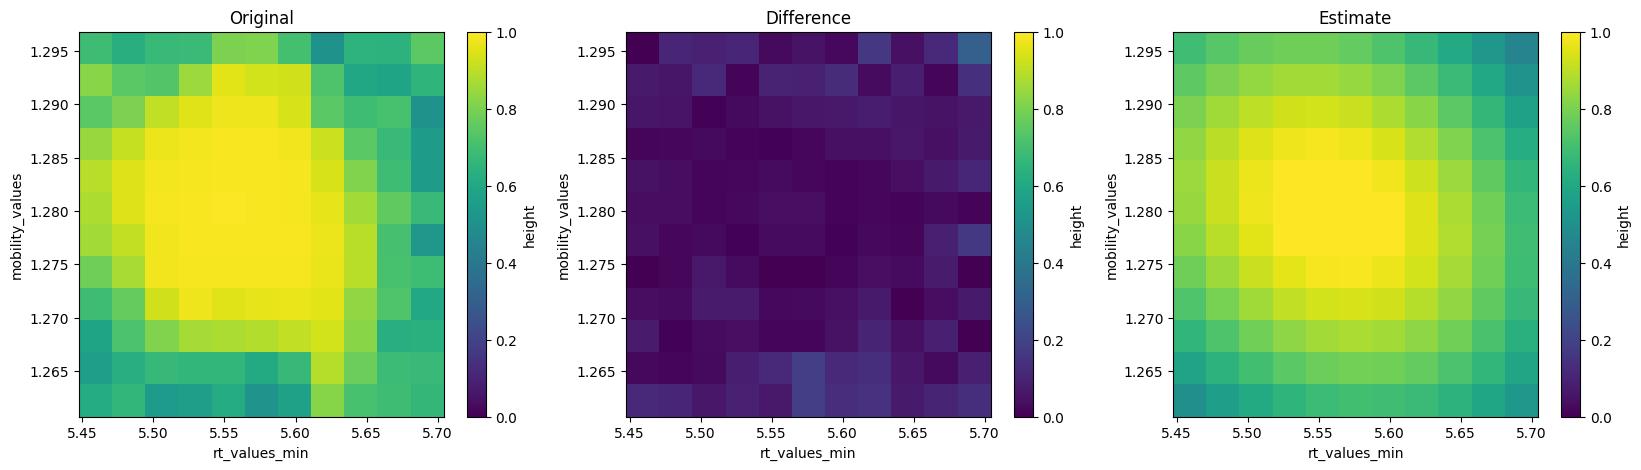

In [11]:
import matplotlib.pyplot as plt

first_axis = 'rt_values_min'
second_axis = 'mobility_values'

if second_axis == 'mobility_values':
    df = mob_rt_examples[peak_region]['df'].copy()
    Z = mob_rt_examples[peak_region]['image'].copy()
elif second_axis == 'mz_values':
    df = mz_rt_examples[peak_region]['df'].copy()
    Z = mz_rt_examples[peak_region]['image'].copy()

# Get sampling points
exec("X_np = df[['%s', '%s']].values.astype(np.float32)" % (first_axis, second_axis))
# estimate function value
df['height'] = jsu_likelihood(tf.convert_to_tensor(opt_params, dtype=tf.float32), X_np).numpy() 

pivot = df.pivot(
        index=second_axis,
        columns=first_axis,
        values='height'    
    )
estimate = pivot.values 


x = pivot.columns.values     # Länge = n_mz
y = pivot.index.values       # Länge = n_rt

fig, ax = plt.subplots(1, 3, figsize=(20, 5))

from matplotlib.colors import Normalize

# Normalisierung von 0 bis 1
norm = Normalize(vmin=0, vmax=1)


mesh0 = ax[0].pcolormesh(
    x, y, Z,                 
    shading='auto',          
    cmap='viridis',  
    norm=norm,
)
fig.colorbar(mesh0, ax=ax[0], label='height')
ax[0].set_ylabel(second_axis)
ax[0].set_xlabel(first_axis)
ax[0].set_title('Original')

mesh1 = ax[1].pcolormesh(
    x, y, np.abs(Z - estimate),                 
    shading='auto',          
    cmap='viridis', 
    norm=norm,           
)
fig.colorbar(mesh1, ax=ax[1], label='height')
ax[1].set_ylabel(second_axis)
ax[1].set_xlabel(first_axis)
ax[1].set_title('Difference')

mesh2 = ax[2].pcolormesh(
    x, y,  estimate,                 
    shading='auto',         
    cmap='viridis',  
    norm=norm,       
)
fig.colorbar(mesh2, ax=ax[2], label='height')
ax[2].set_ylabel(second_axis)
ax[2].set_xlabel(first_axis)
ax[2].set_title('Estimate')
plt.show()

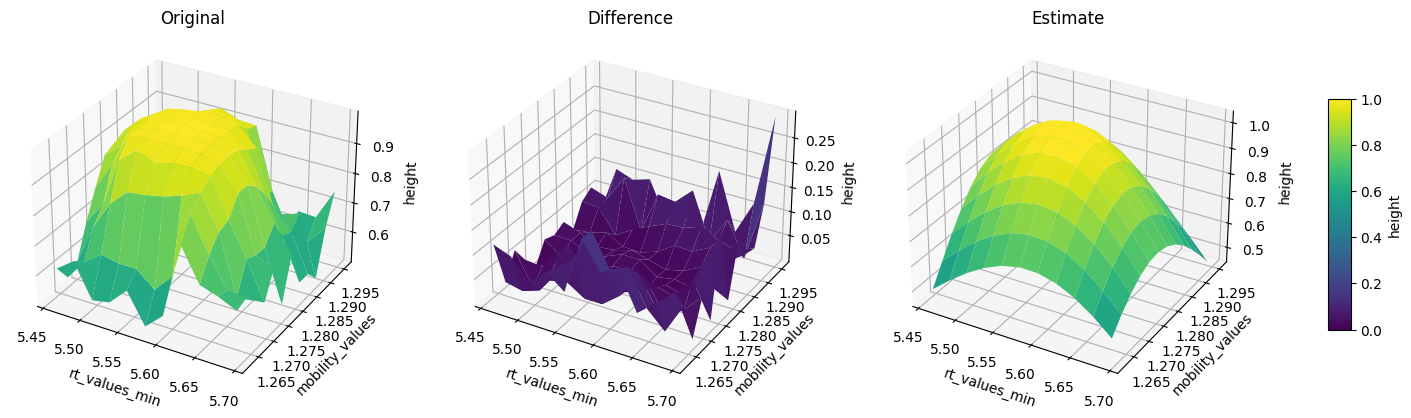

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from mpl_toolkits.mplot3d import Axes3D  # muss importiert sein, auch wenn nicht direkt verwendet

# 1) Gitter erstellen
X, Y = np.meshgrid(x, y)

# 2) gemeinsame Farbskalierung von 0…1
norm = Normalize(vmin=0, vmax=1)

# 3) Figure und 3D-Achse
fig, axes = plt.subplots(
    1, 3, 
    subplot_kw={'projection': '3d'}, 
    figsize=(20, 6)
)

for ax, Zdata, title in zip(
    axes,
    [Z, np.abs(Z - estimate), estimate],
    ['Original', 'Difference', 'Estimate']
):
    surf = ax.plot_surface(X, Y, Zdata, cmap='viridis', norm=norm)
    ax.set_xlabel(first_axis)
    ax.set_ylabel(second_axis)
    ax.set_zlabel('height')
    ax.set_title(title)

# gemeinsame Colorbar
fig.colorbar(surf, ax=axes.tolist(), shrink=0.5, aspect=10, label='height')
plt.show()



### weitere Verteilungen

In [16]:
import numpy as np
import tensorflow as tf

# --- 1. Datenvorbereitung ---
# Hol dir deine Peak-Region und baue daraus NumPy-Arrays
peak_region = 9

df = mob_rt_examples[peak_region]['df']

# X: (N_samples, 3), Y: (N_samples,)
X_np = df[['rt_values_min', 'mobility_values']].values.astype(np.float32)
Y_np = df['height'].values.astype(np.float32)
sum_intensities = np.sum(Y_np**2)

# In TensorFlow konvertieren
X = tf.constant(X_np)                  # shape [N, 2] <- (rt_values_min, mobility_values) for all N samples
Y = tf.constant(Y_np)                  # shape [N] 

In [17]:
def train(params, dichte, epochs = 100000, learning_rate=1e-2):

    def loss_fn(params):
        rho = dichte(params, X)        # Vorhersagen [N]
        # mittlere quadratische Abweichung, normalisiert durch Summe aller Intensitäten
        mse = tf.reduce_sum((Y - rho)**2) / sum_intensities
        return mse

    # --- 4. Optimizer und Trainingsschleife ---
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    # Anzahl der Iterationen / Epochen
    #epochs = 20000

    old_loss = np.inf
    opt_params = None

    for epoch in range(epochs):
        with tf.GradientTape() as tape:
            loss = loss_fn(params)
        grads = tape.gradient(loss, [params])
        optimizer.apply_gradients(zip(grads, [params]))

        if loss.numpy() < old_loss:
            # Speichere die besten Parameter und den besten Verlust
            old_loss = loss.numpy()
            opt_params = params.numpy()

        if epoch % 200 == 0:
            print(f"Epoch {epoch:4d}, Loss = {loss.numpy():.6e}, Best Loss = {old_loss:.6e}")

    # --- 5. Ergebnisse ausgeben ---
    print("Optimierte Parameter:", opt_params)
    opt_loss = loss_fn(tf.convert_to_tensor(opt_params, dtype=tf.float32)).numpy()
    print("Finaler Fehler:", opt_loss)
    return opt_params


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from mpl_toolkits.mplot3d import Axes3D  # muss importiert sein, auch wenn nicht direkt verwendet

def plot(params, dichte):
    first_axis = 'rt_values_min'
    second_axis = 'mobility_values'

    if second_axis == 'mobility_values':
        df = mob_rt_examples[peak_region]['df'].copy()
        Z = mob_rt_examples[peak_region]['image'].copy()
    elif second_axis == 'mz_values':
        df = mz_rt_examples[peak_region]['df'].copy()
        Z = mz_rt_examples[peak_region]['image'].copy()

    # Get sampling points
    exec("X_np = df[['%s', '%s']].values.astype(np.float32)" % (first_axis, second_axis))
    # estimate function value
    df['height'] = dichte(tf.convert_to_tensor(params, dtype=tf.float32), X_np).numpy() 

    pivot = df.pivot(
            index=second_axis,
            columns=first_axis,
            values='height'    
        )
    estimate = pivot.values 


    x = pivot.columns.values     # Länge = n_mz
    y = pivot.index.values       # Länge = n_rt

    # 1) Gitter erstellen
    X_mesh, Y_mesh = np.meshgrid(x, y)

    # 2) gemeinsame Farbskalierung von 0…1
    norm = Normalize(vmin=0, vmax=1)

    # 3) Figure und 3D-Achse
    fig, axes = plt.subplots(
        1, 3, 
        subplot_kw={'projection': '3d'}, 
        figsize=(20, 6)
    )

    for ax, Zdata, title in zip(
        axes,
        [Z, np.abs(Z - estimate), estimate],
        ['Original', 'Difference', 'Estimate']
    ):
        surf = ax.plot_surface(X_mesh, Y_mesh, Zdata, cmap='viridis', norm=norm)
        ax.set_xlabel(first_axis)
        ax.set_ylabel(second_axis)
        ax.set_zlabel('height')
        ax.set_title(title)

    # gemeinsame Colorbar
    fig.colorbar(surf, ax=axes.tolist(), shrink=0.5, aspect=10, label='height')
    plt.show()


#### Tukey-g-and-h–Verteilung

Gefunden: https://arxiv.org/pdf/2411.07957

- Formel (multivariat):

$$
p(x)=\alpha \prod_{i=1}^n|\underbrace{\frac{d}{d z}\left[\frac{e^{g_i z}-1}{g_i} e^{\frac{h_i z^2}{2}}\right]}_{d Q_i / d z}|_{z=(A(x-\zeta))_i} .
$$


In [16]:
# --- Parameterzahl und Variablen ---
n = 2
# params = [alpha, zeta(n), g(n), h(n>=0), A(n×n)]
num_params = 1 + n + n + n + n*n
params = tf.Variable(tf.random.normal([num_params], stddev=0.1), name="gh_params")

def tukey_gh_mvd(params, X):
    alpha = params[0]
    zeta  = params[1:1+n]
    g     = params[1+n:1+2*n]
    h     = tf.nn.relu(params[1+2*n:1+3*n])       # h ≥ 0
    A_flat= params[1+3*n:]
    A     = tf.reshape(A_flat, (n,n))

    #print("X.shape: ", X.shape)
    #print("zeta.shape: ", zeta.shape)

    # Whitening
    centered = X - zeta                           # [N,n]
    Z        = tf.matmul(centered, A, transpose_b=True)  # [N,n]

    # Quantil-Funktion und ihr Ableiter:
    # Q(z) = (e^{g z} - 1)/g * e^{h z^2/2}
    exp_gz = tf.exp(g * Z)
    W      = (exp_gz - 1) / g                     # [N,n]
    e_h    = tf.exp(0.5 * h * Z**2)               # [N,n]

    # dQ/dz = e^{h z^2/2} * ( e^{g z} + W * h * z )
    dQdz   = e_h * (exp_gz + W * h * Z)           # [N,n]

    rho = alpha * tf.reduce_prod(tf.abs(dQdz), axis=1)  # [N]
    return rho


In [17]:
params_tukey_gh = train(params, tukey_gh_mvd)

Epoch    0, Loss = 1.253773e+00, Best Loss = 1.253773e+00
Epoch  200, Loss = 3.441001e-02, Best Loss = 3.441001e-02
Epoch  400, Loss = 3.437418e-02, Best Loss = 3.437418e-02
Epoch  600, Loss = 3.432690e-02, Best Loss = 3.432690e-02
Epoch  800, Loss = 3.426925e-02, Best Loss = 3.426925e-02
Epoch 1000, Loss = 3.420012e-02, Best Loss = 3.420012e-02
Epoch 1200, Loss = 3.411498e-02, Best Loss = 3.411498e-02
Epoch 1400, Loss = 3.400242e-02, Best Loss = 3.400242e-02
Epoch 1600, Loss = 3.383595e-02, Best Loss = 3.383595e-02
Epoch 1800, Loss = 3.355875e-02, Best Loss = 3.355875e-02
Epoch 2000, Loss = 3.307425e-02, Best Loss = 3.307425e-02
Epoch 2200, Loss = 3.233347e-02, Best Loss = 3.233347e-02
Epoch 2400, Loss = 3.167002e-02, Best Loss = 3.167002e-02
Epoch 2600, Loss = 3.140689e-02, Best Loss = 3.140689e-02
Epoch 2800, Loss = 3.134140e-02, Best Loss = 3.134140e-02
Epoch 3000, Loss = 3.132689e-02, Best Loss = 3.132689e-02
Epoch 3200, Loss = 3.132193e-02, Best Loss = 3.132189e-02
Epoch 3400, Lo

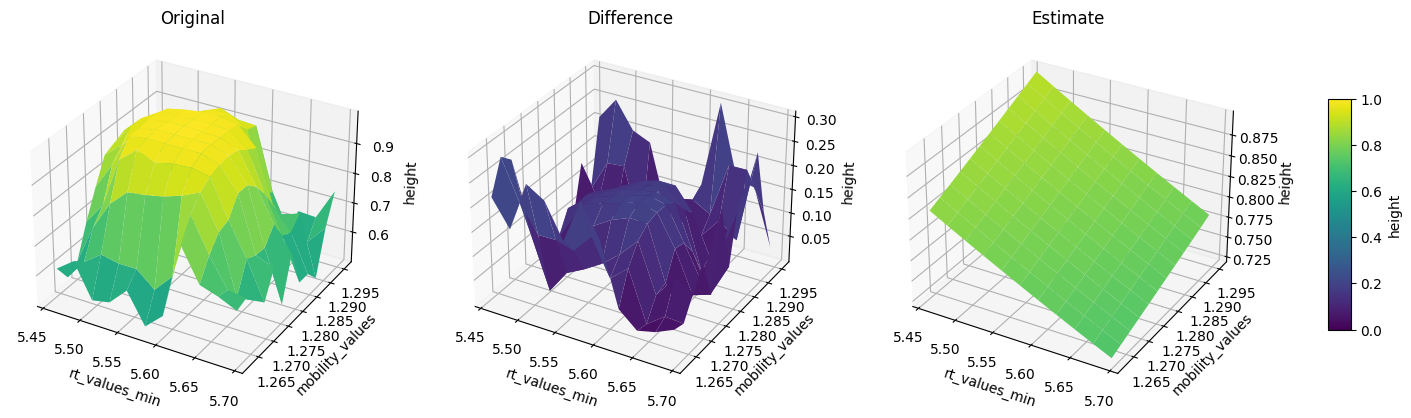

In [18]:
plot(params_tukey_gh, tukey_gh_mvd)

#### Normalverteilung

\begin{equation}
p(x)=\alpha \exp \left(-\frac{1}{2} y^{\top} y\right), \quad y=A(x-\zeta) .
\end{equation}

In [19]:
# --- Parameterzahl und Variablen ---
n = 2
# params = [alpha, zeta(n), A(n×n)]
num_params = 1 + n + n*n
params = tf.Variable(tf.random.normal([num_params], stddev=0.1), name="normal_params")

def normal_mvd(params, X):
    alpha = params[0]
    zeta  = params[1:1+n]
    A_flat= params[1+n:]
    A     = tf.reshape(A_flat, (n,n))

    centered = X - zeta
    Y        = tf.matmul(centered, A, transpose_b=True)  # [N,n]

    # univariate Normal (bis auf Konstanten): exp(-½ z^2)
    rho_comp = tf.exp(-0.5 * Y**2)                        # [N,n]

    rho = alpha * tf.reduce_prod(rho_comp, axis=1)       # [N]
    return rho


In [20]:
params_normal = train(params, normal_mvd)

Epoch    0, Loss = 1.098857e+00, Best Loss = 1.098857e+00
Epoch  200, Loss = 3.388780e-02, Best Loss = 3.388780e-02
Epoch  400, Loss = 3.381709e-02, Best Loss = 3.381709e-02
Epoch  600, Loss = 3.372130e-02, Best Loss = 3.372130e-02
Epoch  800, Loss = 3.358343e-02, Best Loss = 3.358343e-02
Epoch 1000, Loss = 3.337358e-02, Best Loss = 3.337358e-02
Epoch 1200, Loss = 3.305094e-02, Best Loss = 3.305094e-02
Epoch 1400, Loss = 3.258850e-02, Best Loss = 3.258850e-02
Epoch 1600, Loss = 3.204259e-02, Best Loss = 3.204259e-02
Epoch 1800, Loss = 3.157734e-02, Best Loss = 3.157734e-02
Epoch 2000, Loss = 3.132143e-02, Best Loss = 3.132143e-02
Epoch 2200, Loss = 3.122001e-02, Best Loss = 3.122001e-02
Epoch 2400, Loss = 3.118200e-02, Best Loss = 3.117962e-02
Epoch 2600, Loss = 3.115919e-02, Best Loss = 3.115919e-02
Epoch 2800, Loss = 3.114349e-02, Best Loss = 3.114349e-02
Epoch 3000, Loss = 3.112803e-02, Best Loss = 3.112803e-02
Epoch 3200, Loss = 3.111247e-02, Best Loss = 3.111247e-02
Epoch 3400, Lo

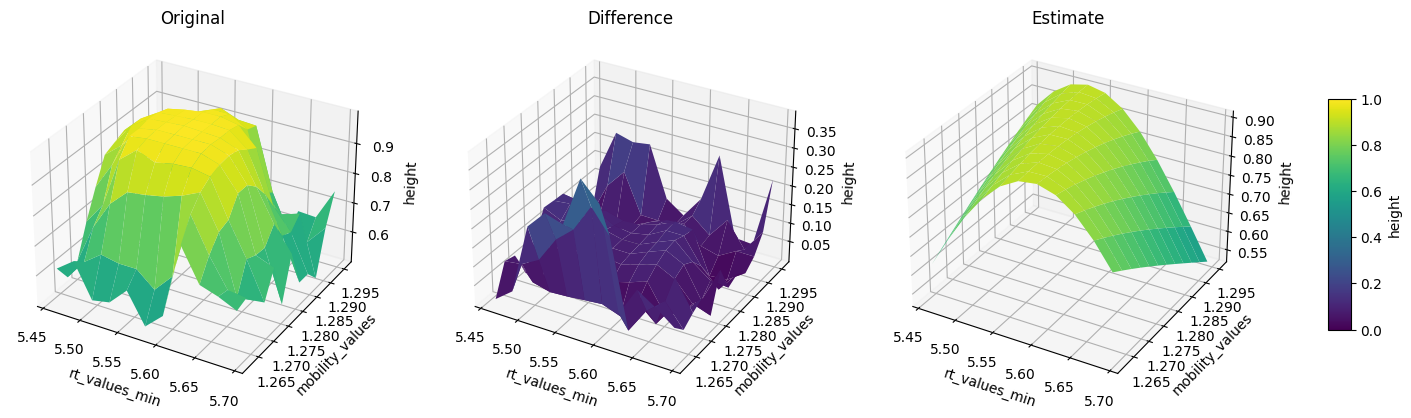

In [21]:
plot(params_normal, normal_mvd)

#### Exponentially Modified Gaussian

Univariat ist

$$
f(x ; \mu, \sigma, \lambda)=\frac{\lambda}{2} \exp \left[\frac{\lambda}{2}\left(2 \mu+\lambda \sigma^2-2 x\right)\right] \operatorname{erfc}\left(\frac{\mu+\lambda \sigma^2-x}{\sqrt{2} \sigma}\right) .
$$


Setzen wir $\mu=0, \sigma=1$ (das Whitening übernimmt A), so gilt (bis auf konstanten Faktor) $\rho(y ; \lambda) \propto \exp (-\lambda y) \quad \operatorname{erfc}((\lambda-y) / \sqrt{2})$.

Formel multivariat:
\begin{equation}
p(x)=\alpha \prod_{i=1}^n\left[\exp \left(-\lambda_i y_i\right) \quad \operatorname{erfc}\left(\frac{\lambda_i-y_i}{\sqrt{2}}\right)\right], \quad y=A(x-\zeta) .
\end{equation}

In [22]:
# --- Parameterzahl und Variablen ---
n = 2
# params = [alpha, zeta(n), lambda(n>0), A(n×n)]
num_params = 1 + n + n + n*n
params = tf.Variable(tf.random.normal([num_params], stddev=0.1), name="emg_params")

def emg_mvd(params, X):
    alpha = params[0]
    zeta  = params[1:1+n]
    lam   = tf.nn.softplus(params[1+n:1+2*n])  # λ>0
    A_flat= params[1+2*n:]
    A     = tf.reshape(A_flat, (n,n))

    centered = X - zeta
    Y        = tf.matmul(centered, A, transpose_b=True)  # [N,n]

    # univ. EMG-Dichte (bis auf Konstanten):
    erfc_arg = (lam - Y) / tf.sqrt(2.0)
    rho_comp = tf.exp(-lam * Y) * tf.math.erfc(erfc_arg)  # [N,n]

    rho = alpha * tf.reduce_prod(rho_comp, axis=1)       # [N]
    return rho


In [23]:
params_emg = train(params, emg_mvd)

Epoch    0, Loss = 1.114349e+00, Best Loss = 1.114349e+00
Epoch  200, Loss = 3.337605e-02, Best Loss = 3.337605e-02
Epoch  400, Loss = 3.314300e-02, Best Loss = 3.314300e-02
Epoch  600, Loss = 3.293218e-02, Best Loss = 3.293218e-02
Epoch  800, Loss = 3.273212e-02, Best Loss = 3.273212e-02
Epoch 1000, Loss = 3.253423e-02, Best Loss = 3.253423e-02
Epoch 1200, Loss = 3.233564e-02, Best Loss = 3.233564e-02
Epoch 1400, Loss = 3.214028e-02, Best Loss = 3.214028e-02
Epoch 1600, Loss = 3.195756e-02, Best Loss = 3.195756e-02
Epoch 1800, Loss = 3.179811e-02, Best Loss = 3.179811e-02
Epoch 2000, Loss = 3.166879e-02, Best Loss = 3.166879e-02
Epoch 2200, Loss = 3.156970e-02, Best Loss = 3.156970e-02
Epoch 2400, Loss = 3.149747e-02, Best Loss = 3.149622e-02
Epoch 2600, Loss = 3.143734e-02, Best Loss = 3.143734e-02
Epoch 2800, Loss = 3.138150e-02, Best Loss = 3.138150e-02
Epoch 3000, Loss = 3.132102e-02, Best Loss = 3.132102e-02
Epoch 3200, Loss = 3.125051e-02, Best Loss = 3.125051e-02
Epoch 3400, Lo

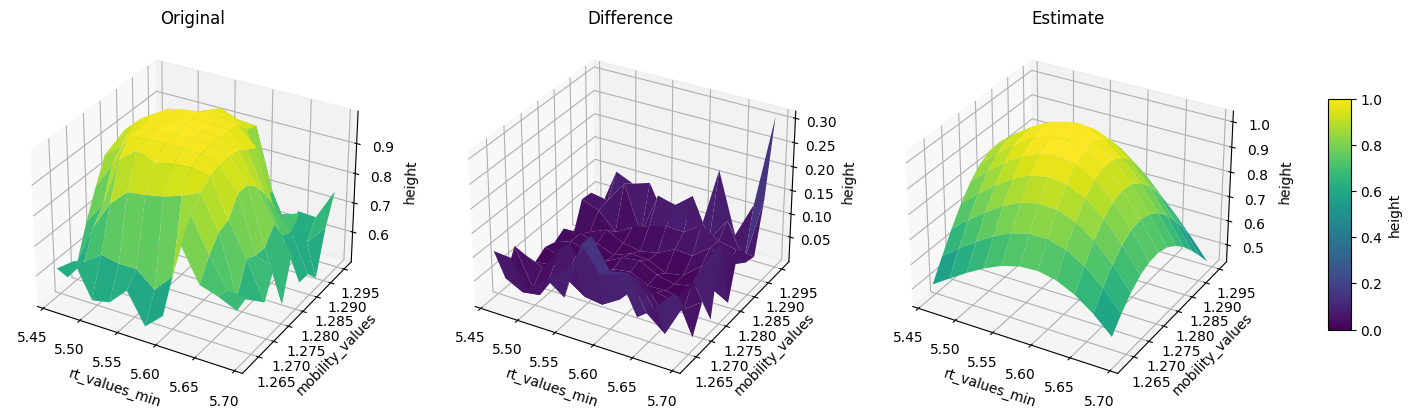

In [24]:
plot(params_emg, emg_mvd)

#### Symmetrische α-stable

Our $\beta$ is $\alpha$

\begin{equation}
p(x)=\alpha \prod_{i=1}^n \exp \left(-\left|y_i\right|^{\beta_i}\right), \quad y=A(x-\zeta) .
\end{equation}

In [25]:
# --- Parameterzahl und Variables ---
n = 2
# alpha, zeta (n), beta (n), A (n×n)
num_params = 1 + n + n + n*n
params = tf.Variable(tf.random.normal([num_params], stddev=0.1), name="ged_params")

def ged_mvd(params, X):
    # n aus Länge params errechnen oder explizit setzen
    alpha = params[0]
    zeta   = params[1:1+n]                   # Lage
    beta   = tf.nn.softplus(params[1+n:1+2*n])     # Form > 0
    A_flat = params[1+2*n:]
    A      = tf.reshape(A_flat, (n,n))      # Precision-Faktor

    # transformieren
    centered   = X - zeta                    # [N,n]
    Y          = tf.matmul(centered, A, transpose_b=True)  # [N,n]

    # component-wise GED-Dichte (bis auf Konstanten)
    # ρ_i ∝ exp(-|y|^β)
    exponent        = - tf.abs(Y)**beta      # [N,n]
    rho_components  = tf.exp(exponent)       # [N,n]

    rho = alpha * tf.reduce_prod(rho_components, axis=1)  # [N]
    return rho


In [26]:
params_ged = train(params, ged_mvd)

Epoch    0, Loss = 8.713275e-01, Best Loss = 8.713275e-01
Epoch  200, Loss = 3.260352e-02, Best Loss = 3.260286e-02
Epoch  400, Loss = 3.303506e-02, Best Loss = 3.179805e-02
Epoch  600, Loss = 3.222288e-02, Best Loss = 3.176475e-02
Epoch  800, Loss = 3.211900e-02, Best Loss = 3.165701e-02
Epoch 1000, Loss = 3.201217e-02, Best Loss = 3.165701e-02
Epoch 1200, Loss = 3.193317e-02, Best Loss = 3.165701e-02
Epoch 1400, Loss = 3.187251e-02, Best Loss = 3.165701e-02
Epoch 1600, Loss = 3.182511e-02, Best Loss = 3.165701e-02
Epoch 1800, Loss = 3.178755e-02, Best Loss = 3.165701e-02
Epoch 2000, Loss = 3.175720e-02, Best Loss = 3.165701e-02
Epoch 2200, Loss = 3.173208e-02, Best Loss = 3.165701e-02
Epoch 2400, Loss = 3.171042e-02, Best Loss = 3.165701e-02
Epoch 2600, Loss = 3.171244e-02, Best Loss = 3.165701e-02
Epoch 2800, Loss = 3.167369e-02, Best Loss = 3.165701e-02
Epoch 3000, Loss = 3.165736e-02, Best Loss = 3.165701e-02
Epoch 3200, Loss = 3.164447e-02, Best Loss = 3.164402e-02
Epoch 3400, Lo

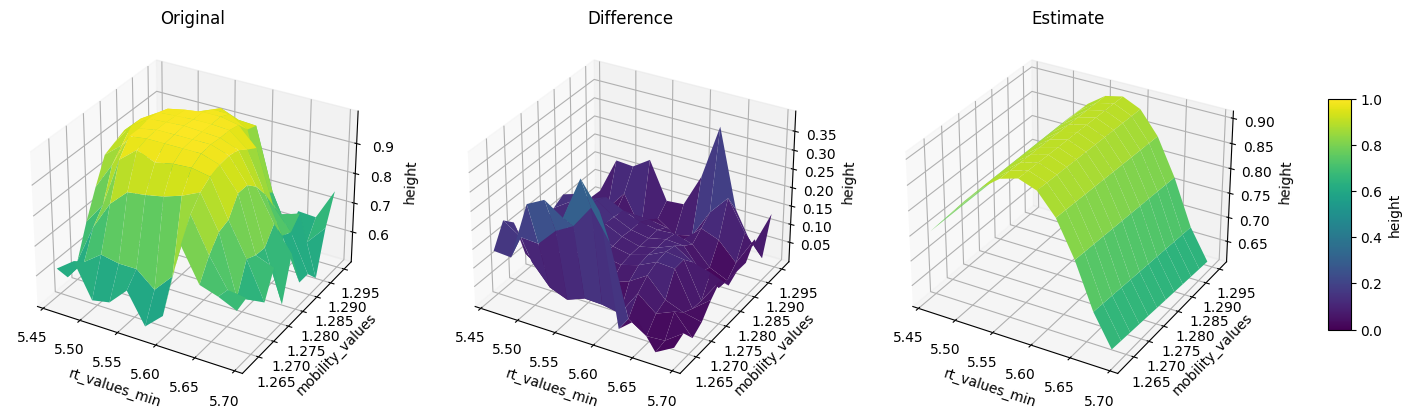

In [27]:
plot(params_ged, ged_mvd)

#### Student-t

\begin{equation}
p(x)=\alpha \prod_{i=1}^n\left(1+\frac{y_i^2}{\nu}\right)^{-\frac{\nu+1}{2}}, \quad y=A(x-\zeta) .
\end{equation}

In [28]:
# alpha, zeta(n), ν (Skalar), A(n×n)
num_params = 1 + n + 1 + n*n
params = tf.Variable(tf.random.normal([num_params], stddev=0.1), name="t_params")

def student_t_mvd(params, X):
    alpha = params[0]
    zeta  = params[1:1+n]
    nu    = tf.nn.softplus(params[1+n]) + 1e-3   # ν>0
    A_flat = params[2+n:]
    A     = tf.reshape(A_flat, (n,n))

    centered = X - zeta
    Y        = tf.matmul(centered, A, transpose_b=True)

    # univariate t-Dichte (bis auf Konstanten):
    # ρ_i ∝ (1 + y_i^2/nu)^(-(nu+1)/2)
    rho_comp = (1 + Y**2/nu)**(-0.5*(nu+1))
    rho = alpha * tf.reduce_prod(rho_comp, axis=1)
    return rho

In [29]:
params_student = train(params, student_t_mvd)

Epoch    0, Loss = 1.226843e+00, Best Loss = 1.226843e+00
Epoch  200, Loss = 3.391431e-02, Best Loss = 3.391194e-02
Epoch  400, Loss = 3.389912e-02, Best Loss = 3.389912e-02
Epoch  600, Loss = 3.383638e-02, Best Loss = 3.383638e-02
Epoch  800, Loss = 3.374088e-02, Best Loss = 3.374088e-02
Epoch 1000, Loss = 3.361659e-02, Best Loss = 3.361659e-02
Epoch 1200, Loss = 3.345324e-02, Best Loss = 3.345324e-02
Epoch 1400, Loss = 3.323726e-02, Best Loss = 3.323726e-02
Epoch 1600, Loss = 3.295307e-02, Best Loss = 3.295307e-02
Epoch 1800, Loss = 3.259065e-02, Best Loss = 3.259065e-02
Epoch 2000, Loss = 3.216635e-02, Best Loss = 3.216635e-02
Epoch 2200, Loss = 3.174343e-02, Best Loss = 3.174343e-02
Epoch 2400, Loss = 3.142160e-02, Best Loss = 3.142160e-02
Epoch 2600, Loss = 3.127141e-02, Best Loss = 3.127141e-02
Epoch 2800, Loss = 3.122217e-02, Best Loss = 3.122217e-02
Epoch 3000, Loss = 3.118685e-02, Best Loss = 3.118685e-02
Epoch 3200, Loss = 3.112241e-02, Best Loss = 3.112241e-02
Epoch 3400, Lo

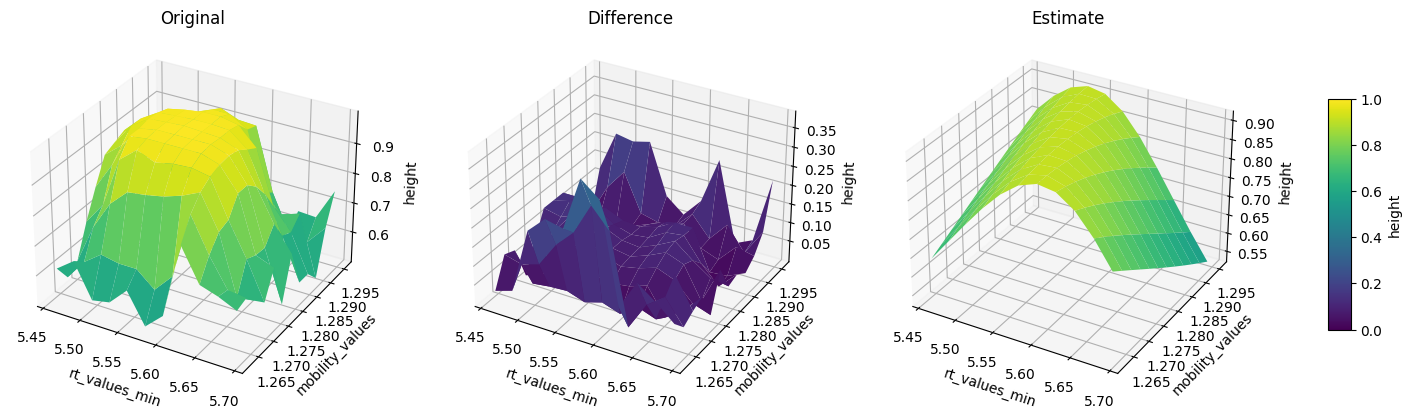

In [30]:
plot(params_student, student_t_mvd)

#### Multivariate Skew-Normal (Azzalini)

\begin{equation}
p(x)=\alpha \prod_{i=1}^n 2 \varphi\left(y_i\right) \Phi\left(\lambda_i y_i\right), \quad y=A(x-\zeta) .
\end{equation}

$\phi$ is die Dichte, $\Phi$ die Verteilungsfunktion der Normalverteilung



In [31]:
# alpha, zeta(n), shape λ(n), A(n×n)
num_params = 1 + n + n + n*n
params = tf.Variable(tf.random.normal([num_params], stddev=0.1), name="sn_params")

def skew_normal_mvd(params, X):
    alpha = params[0]
    zeta   = params[1:1+n]
    lam    = params[1+n:1+2*n]          # Schiefewinkel
    A_flat = params[1+2*n:]
    A      = tf.reshape(A_flat, (n,n))

    centered = X - zeta
    Y        = tf.matmul(centered, A, transpose_b=True)

    # Standard-Normal-Dichte und -Verteilungsfunktion
    phi = tf.exp(-0.5*Y**2)/tf.sqrt(2*tf.constant(np.pi))
    Phi = 0.5*(1 + tf.math.erf(lam*Y/tf.sqrt(2.0)))

    rho_comp = 2*phi*Phi
    rho = alpha * tf.reduce_prod(rho_comp, axis=1)
    return rho


In [32]:
params_skew_normal = train(params, skew_normal_mvd)

Epoch    0, Loss = 9.092094e-01, Best Loss = 9.092094e-01
Epoch  200, Loss = 4.087041e-02, Best Loss = 4.087041e-02
Epoch  400, Loss = 3.336235e-02, Best Loss = 3.336235e-02
Epoch  600, Loss = 3.261403e-02, Best Loss = 3.261403e-02
Epoch  800, Loss = 3.156158e-02, Best Loss = 3.155911e-02
Epoch 1000, Loss = 3.100100e-02, Best Loss = 3.100100e-02
Epoch 1200, Loss = 3.067024e-02, Best Loss = 3.067024e-02
Epoch 1400, Loss = 3.005937e-02, Best Loss = 3.005937e-02
Epoch 1600, Loss = 2.883330e-02, Best Loss = 2.883330e-02
Epoch 1800, Loss = 2.701004e-02, Best Loss = 2.701004e-02
Epoch 2000, Loss = 2.560988e-02, Best Loss = 2.560988e-02
Epoch 2200, Loss = 2.499856e-02, Best Loss = 2.497604e-02
Epoch 2400, Loss = 2.471044e-02, Best Loss = 2.471044e-02
Epoch 2600, Loss = 2.460211e-02, Best Loss = 2.460211e-02
Epoch 2800, Loss = 2.453563e-02, Best Loss = 2.453563e-02
Epoch 3000, Loss = 2.447905e-02, Best Loss = 2.447905e-02
Epoch 3200, Loss = 2.442413e-02, Best Loss = 2.442413e-02
Epoch 3400, Lo

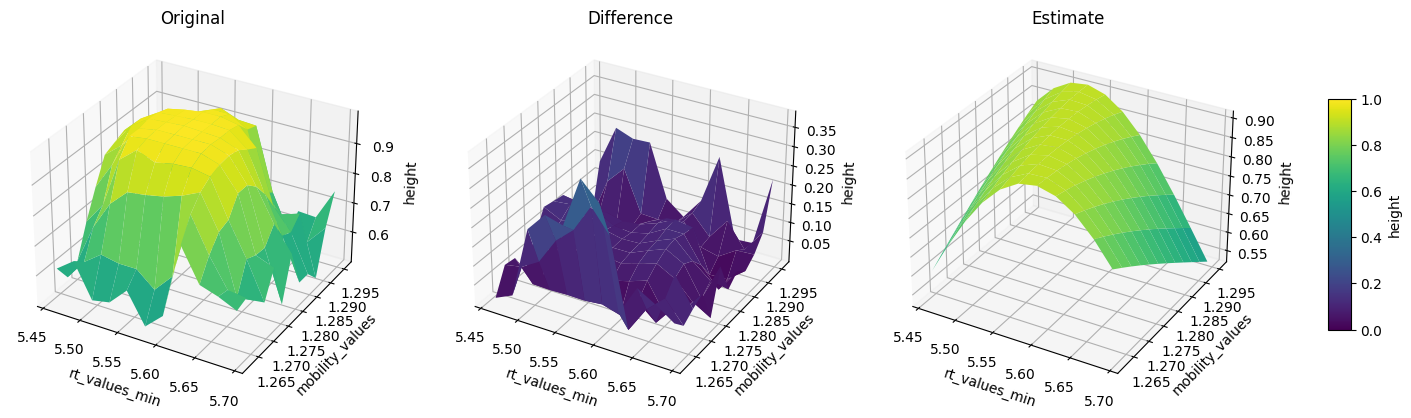

In [33]:
plot(params_skew_normal, skew_normal_mvd)

#### Pearson type IV as general distributions

The normal distribution is the limit

##### IV

\begin{equation}
\rho_i(y) \propto\left(1+y_i^2 / \nu_i\right)^{-m_i} \exp \left(n_i \arctan \left(y_i / \sqrt{\nu_i}\right)\right)
\end{equation}

In [34]:
# params = [alpha, zeta(n), m(n)>0, n(n), nu(n)>0, A(n×n)]
num_params = 1 + n + n + n + n + n*n
params = tf.Variable(tf.random.normal([num_params], stddev=0.1), name="pearsonIV")

def pearsonIV_mvd(params, X):
    alpha = params[0]
    zeta   = params[1:1+n]
    m      = tf.nn.softplus(params[1+n:1+2*n])         # m>0
    npar   = params[1+2*n:1+3*n]                       # n real
    nu     = tf.nn.softplus(params[1+3*n:1+4*n])       # ν>0
    A_flat = params[1+4*n:]
    A      = tf.reshape(A_flat,(n,n))

    Y = tf.matmul(X - zeta, A, transpose_b=True)

    # pearson IV
    term1 = (1 + (Y**2)/nu)**(-m)
    term2 = tf.exp(npar * tf.atan(Y/tf.sqrt(nu)))
    rho_i = term1 * term2
    rho = alpha * tf.reduce_prod(rho_i, axis=1)
    return rho


In [35]:
params_pearson_IV = train(params, pearsonIV_mvd)

Epoch    0, Loss = 1.131398e+00, Best Loss = 1.131398e+00
Epoch  200, Loss = 3.398428e-02, Best Loss = 3.397476e-02
Epoch  400, Loss = 3.379099e-02, Best Loss = 3.379099e-02
Epoch  600, Loss = 3.358449e-02, Best Loss = 3.358449e-02
Epoch  800, Loss = 3.342244e-02, Best Loss = 3.342244e-02
Epoch 1000, Loss = 3.326770e-02, Best Loss = 3.326770e-02
Epoch 1200, Loss = 3.310612e-02, Best Loss = 3.310612e-02
Epoch 1400, Loss = 3.292986e-02, Best Loss = 3.292986e-02
Epoch 1600, Loss = 3.272373e-02, Best Loss = 3.272373e-02
Epoch 1800, Loss = 3.245531e-02, Best Loss = 3.245531e-02
Epoch 2000, Loss = 3.207430e-02, Best Loss = 3.207430e-02
Epoch 2200, Loss = 3.162603e-02, Best Loss = 3.162603e-02
Epoch 2400, Loss = 3.143072e-02, Best Loss = 3.142603e-02
Epoch 2600, Loss = 3.188528e-02, Best Loss = 3.135601e-02
Epoch 2800, Loss = 3.130684e-02, Best Loss = 3.130684e-02
Epoch 3000, Loss = 3.125361e-02, Best Loss = 3.125361e-02
Epoch 3200, Loss = 3.117423e-02, Best Loss = 3.117423e-02
Epoch 3400, Lo

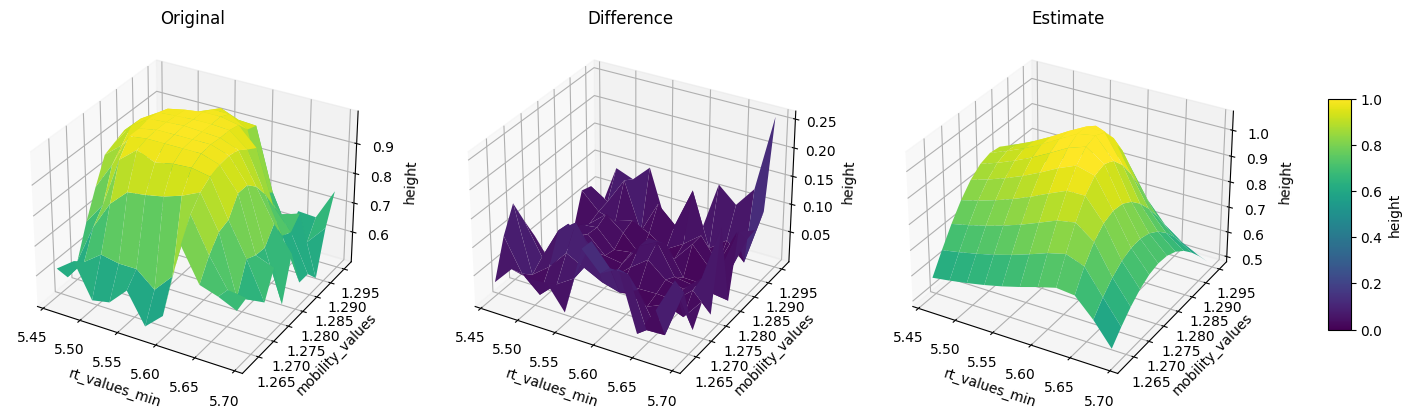

In [36]:
plot(params_pearson_IV, pearsonIV_mvd)

#### Johnson $S_U$ with matrixvalued $\delta$

In [37]:
# --- 2. Parameter als trainierbare Variablen ---
dimensions = 2
number_parameters = 2 * dimensions ** 2 + 2*dimensions + 1
params = tf.Variable(tf.random.normal([number_parameters], stddev=0.1), name="params")

# --- 3. Modell- und Fehlerfunktion definieren ---
def jsu_likelihood2(params, X):
    
    # parameter length
    n = int(-3/2+ np.sqrt(5/4 + len(params.numpy())))
    # 0: alpha
    alpha = params[0]
    # gamma
    gamma = params[1:1+n]
    # zeta
    zeta = params[1+n:1+2*n]
    # delta (absolut)
    delta_sqrt = tf.reshape(params[1+2*n:1+2*n+n*n], (n,n))
    delta = tf.matmul(delta_sqrt, delta_sqrt, transpose_b = True)

    # A-Matrix (3×3), Q = A·Aᵀ
    A = tf.reshape(params[1+2*n+n*n:], (n, n))
    #Q = tf.matmul(A, A, transpose_b=True)  # Q = A @ A.T

    # Achsentransformation: für jeden Sample-Vektor x: Q @ (x - zeta)
    centered = X - zeta                   # broadcast [N,2] - [2] → [N,2]
    transformed = tf.matmul(centered, A, transpose_b=True)  # [N,2]

    # Komponentendichten
    # rho_i = exp(-0.5*(γ_i + δ_i*asinh(t_i))²) / sqrt(1 + t_i²)
    asinh_t = tf.asinh(transformed)      # [N,2]
    exponent = -0.5 * (gamma + tf.matmul(asinh_t, delta, transpose_b=True))**2  # broadcast [2]→[N,2]
    rho_components = tf.exp(exponent) / tf.sqrt(1 + transformed**2)  # [N,2]

    # Gesamt-Wahrscheinlichkeit: α * ∏ₖ ρₖ
    rho = alpha * tf.reduce_prod(rho_components, axis=1)  # [N]
    return rho

In [38]:
params_jsu2 = train(params, jsu_likelihood2, epochs=50000)

Epoch    0, Loss = 1.143604e+00, Best Loss = 1.143604e+00
Epoch  200, Loss = 3.390370e-02, Best Loss = 3.390370e-02
Epoch  400, Loss = 3.388112e-02, Best Loss = 3.388112e-02
Epoch  600, Loss = 3.383087e-02, Best Loss = 3.383087e-02
Epoch  800, Loss = 3.374378e-02, Best Loss = 3.374378e-02
Epoch 1000, Loss = 3.309816e-02, Best Loss = 3.309816e-02
Epoch 1200, Loss = 3.420012e-02, Best Loss = 3.251090e-02
Epoch 1400, Loss = 3.410029e-02, Best Loss = 3.251090e-02
Epoch 1600, Loss = 3.388232e-02, Best Loss = 3.251090e-02
Epoch 1800, Loss = 3.342361e-02, Best Loss = 3.251090e-02
Epoch 2000, Loss = 3.306590e-02, Best Loss = 3.251090e-02
Epoch 2200, Loss = 3.262211e-02, Best Loss = 3.251090e-02
Epoch 2400, Loss = 3.199811e-02, Best Loss = 3.199811e-02
Epoch 2600, Loss = 3.132913e-02, Best Loss = 3.132913e-02
Epoch 2800, Loss = 3.115002e-02, Best Loss = 3.110545e-02
Epoch 3000, Loss = 3.104229e-02, Best Loss = 3.104229e-02
Epoch 3200, Loss = 3.101613e-02, Best Loss = 3.101613e-02
Epoch 3400, Lo

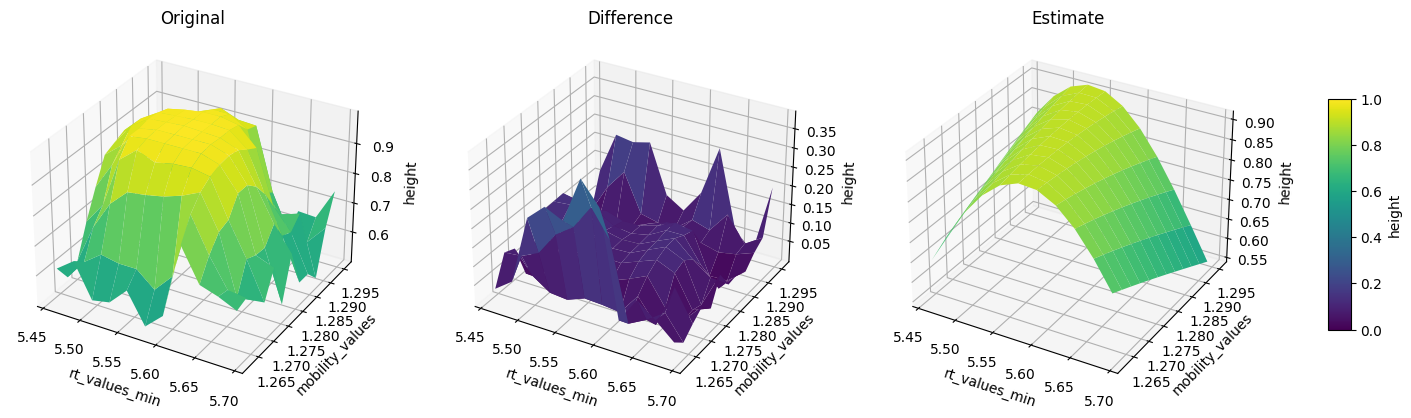

In [39]:
plot(params_jsu2, jsu_likelihood2)

### Kurtosis-adapted skew-normal

In [41]:
# alpha, zeta(n), shape λ(n), A(n×n)
num_params = 1 + 2*n + n + n*n 
params = tf.Variable(tf.random.normal([num_params], stddev=0.1), name="sn_params")
#params[1:1+n] = 2.0 # Initialisierung der Exponenten auf 2.0
# Indizes 1 bis 1+n
indices = tf.range(1, 1 + n, dtype=tf.int32)
updates = tf.fill([n], 2.0)

# Scatter Update
updated_params = tf.tensor_scatter_nd_update(params, tf.reshape(indices, [-1, 1]), updates)
params.assign(updated_params)

def kurtosis_skew_normal_mvd(params, X):
    alpha = params[0]
    p      = params[1:1+n]                # Exponenten
    zeta   = params[1+n:1+2*n]
    lam    = params[1+2*n:1+3*n]          # Schiefewinkel
    A_flat = params[1+3*n:]
    A      = tf.reshape(A_flat, (n,n))

    centered = X - zeta
    Y        = tf.matmul(centered, A, transpose_b=True)

    # Standard-Normal-Dichte und -Verteilungsfunktion
    phi = tf.exp(-0.5*tf.pow(tf.abs(Y),p))/tf.sqrt(2*tf.constant(np.pi))
    Phi = 0.5*(1 + tf.math.erf(lam*Y/tf.sqrt(2.0)))

    rho_comp = phi*Phi
    rho = alpha * tf.reduce_prod(rho_comp, axis=1)
    return rho


In [42]:
params_kurtosis_skew_normal = train(params, kurtosis_skew_normal_mvd)


Epoch    0, Loss = 9.903626e-01, Best Loss = 9.903626e-01
Epoch  200, Loss = 3.762306e-01, Best Loss = 3.762306e-01
Epoch  400, Loss = 7.409230e-02, Best Loss = 7.409230e-02
Epoch  600, Loss = 3.665104e-02, Best Loss = 3.665104e-02
Epoch  800, Loss = 3.387744e-02, Best Loss = 3.387744e-02
Epoch 1000, Loss = 3.302284e-02, Best Loss = 3.302284e-02
Epoch 1200, Loss = 3.129598e-02, Best Loss = 3.129598e-02
Epoch 1400, Loss = 2.996864e-02, Best Loss = 2.996864e-02
Epoch 1600, Loss = 2.923718e-02, Best Loss = 2.923472e-02
Epoch 1800, Loss = 2.863334e-02, Best Loss = 2.863334e-02
Epoch 2000, Loss = 2.789129e-02, Best Loss = 2.789129e-02
Epoch 2200, Loss = 2.701376e-02, Best Loss = 2.701332e-02
Epoch 2400, Loss = 2.624656e-02, Best Loss = 2.612971e-02
Epoch 2600, Loss = 2.546689e-02, Best Loss = 2.546673e-02
Epoch 2800, Loss = 2.511652e-02, Best Loss = 2.508245e-02
Epoch 3000, Loss = 2.488509e-02, Best Loss = 2.488509e-02
Epoch 3200, Loss = 2.478147e-02, Best Loss = 2.478018e-02
Epoch 3400, Lo

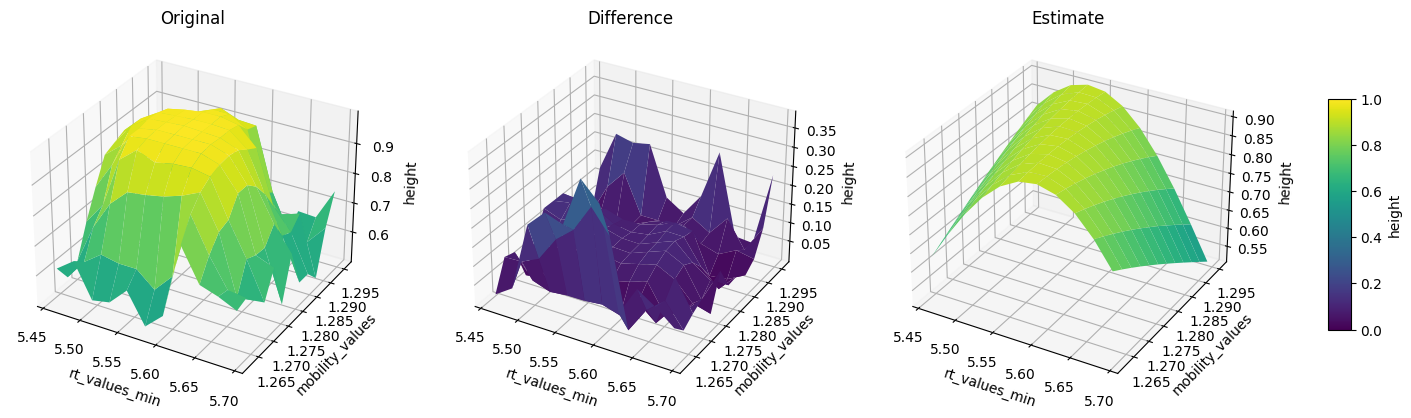

In [43]:
plot(params_kurtosis_skew_normal, kurtosis_skew_normal_mvd)

### Kurtosis adapted skew-normal with positive semidefinite Mixing

In [46]:
# alpha, zeta(n), shape λ(n), A(n×n)
num_params = 1 + 2*n + n + n*n - 1
params = tf.Variable(tf.random.normal([num_params], stddev=0.1), name="sn_params")
#params[1:1+n] = 2.0 # Initialisierung der Exponenten auf 2.0
# Indizes 1 bis 1+n
indices = tf.range(1, 1 + n, dtype=tf.int32)
updates = tf.fill([n], 2.0)

# Scatter Update
updated_params = tf.tensor_scatter_nd_update(params, tf.reshape(indices, [-1, 1]), updates)
params.assign(updated_params)

def kurtosis_skew_normal_spd_2D_mvd(params, X):
    alpha = params[0]
    p      = params[1:1+n]                # Exponenten
    zeta   = params[1+n:1+2*n]
    lam    = params[1+2*n:1+3*n]          # Schiefewinkel
    #A_flat = params[1+3*n:]
    #A      = tf.reshape(A_flat, (n,n))

    log_l11_chol = params[1+3*n]         # Cholesky factor L_cov parameters
    l21_chol = params[2+3*n]              # Off-diagonal Cholesky factor L_cov
    log_l22_chol = params[3+3*n]         # Cholesky factor L_cov parameters


    # 2. Construct the transformation matrix M_transform = (L_cov_inv).T
    # L_cov is the Cholesky factor of the covariance matrix Q_cov = L_cov @ L_cov.T
    # L_cov = [[l11,   0],
    #          [l21, l22]]
    l11 = tf.exp(log_l11_chol)  # Diagonal elements of L_cov must be positive
    l22 = tf.exp(log_l22_chol)
    # l21 is l21_chol (no transformation needed for off-diagonal)

    # Inverse of L_cov: L_cov_inv = [[1/l11, 0], [-l21/(l11*l22), 1/l22]]
    inv_l11 = 1.0 / l11
    inv_l22 = 1.0 / l22

    # M_transform = (L_cov_inv).T
    # M_transform = [[1/l11,            -l21/(l11*l22)],
    #                [0,                1/l22         ]]
    m00 = inv_l11
    m01 = -l21_chol * inv_l11 * inv_l22 # Element (0,1) of M_transform
    m10 = tf.constant(0.0, dtype=X.dtype) # Element (1,0) of M_transform
    m11 = inv_l22                       # Element (1,1) of M_transform

    # Construct M_transform as a 2x2 matrix
    # M_transform = tf.stack([tf.stack([m00, m10]), tf.stack([m01, m11])], axis=0) # if M is row-major
    M_transform_col1 = tf.stack([m00, m10]) # Column 0 of M_transform
    M_transform_col2 = tf.stack([m01, m11]) # Column 1 of M_transform
    A = tf.stack([M_transform_col1, M_transform_col2], axis=1) # Stacks columns to form M


    centered = X - zeta
    Y        = tf.matmul(centered, A, transpose_b=True)

    # Standard-Normal-Dichte und -Verteilungsfunktion
    phi = tf.exp(-0.5*tf.pow(tf.abs(Y),p))/tf.sqrt(2*tf.constant(np.pi))
    Phi = 0.5*(1 + tf.math.erf(lam*Y/tf.sqrt(2.0)))

    rho_comp = phi*Phi
    rho = alpha * tf.reduce_prod(rho_comp, axis=1)
    return rho


In [47]:
params_kurtosis_skew_normal_spd_2D = train(params, kurtosis_skew_normal_spd_2D_mvd)

Epoch    0, Loss = 9.999999e-01, Best Loss = 9.999999e-01
Epoch  200, Loss = 4.120617e-01, Best Loss = 4.120617e-01
Epoch  400, Loss = 5.673012e-02, Best Loss = 5.673012e-02
Epoch  600, Loss = 3.447350e-02, Best Loss = 3.447350e-02
Epoch  800, Loss = 3.361474e-02, Best Loss = 3.361474e-02
Epoch 1000, Loss = 3.338127e-02, Best Loss = 3.338127e-02
Epoch 1200, Loss = 3.228879e-02, Best Loss = 3.228879e-02
Epoch 1400, Loss = 2.234196e-02, Best Loss = 2.234196e-02
Epoch 1600, Loss = 2.155733e-02, Best Loss = 2.150307e-02
Epoch 1800, Loss = 2.126273e-02, Best Loss = 2.126273e-02
Epoch 2000, Loss = 2.110939e-02, Best Loss = 2.110939e-02
Epoch 2200, Loss = 2.094266e-02, Best Loss = 2.094266e-02
Epoch 2400, Loss = 2.074411e-02, Best Loss = 2.074411e-02
Epoch 2600, Loss = 2.043559e-02, Best Loss = 2.043559e-02
Epoch 2800, Loss = 1.988501e-02, Best Loss = 1.988501e-02
Epoch 3000, Loss = 1.814112e-02, Best Loss = 1.814112e-02
Epoch 3200, Loss = 1.617350e-02, Best Loss = 1.616536e-02
Epoch 3400, Lo

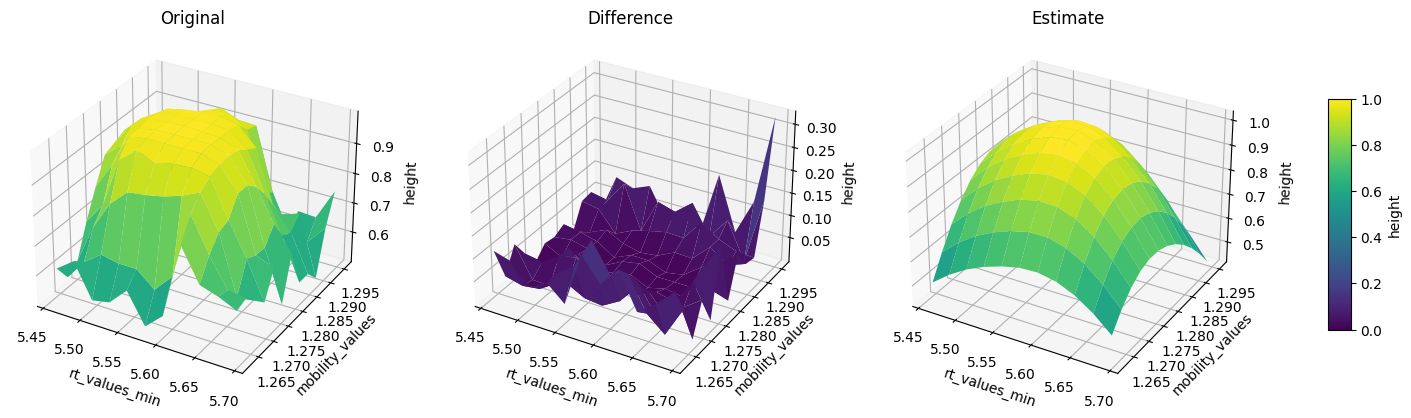

In [48]:
plot(params_kurtosis_skew_normal_spd_2D, kurtosis_skew_normal_spd_2D_mvd)

\begin{equation}
p(x)=\alpha \prod_{i=1}^n e^{-\frac12 |y|^p} \Phi\left(\lambda_i y_i\right), \quad y=A(x-\zeta) .
\end{equation}

$\Phi$ is the gaussian CDF, $A$ is positive semidefinite

#### Shifted skew-general gaussian

In [22]:
# alpha, zeta(n), shape λ(n), A(n×n)
n = 2
num_params = 2 + 2*n + n + n*n - 1
params = tf.Variable(tf.random.normal([num_params], stddev=0.1), name="sn_params")
#params[1:1+n] = 2.0 # Initialisierung der Exponenten auf 2.0
# Indizes 1 bis 1+n
indices = tf.range(2, 2 + n, dtype=tf.int32)
updates = tf.fill([n], 2.0)

# Scatter Update
updated_params = tf.tensor_scatter_nd_update(params, tf.reshape(indices, [-1, 1]), updates)
params.assign(updated_params)

def shifted_kurtosis_skew_normal_spd_2D_mvd(params, X):
    beta   = params[0]                     # Verschiebung
    alpha  = params[1]
    p      = params[2:2+n]                # Exponenten
    zeta   = params[2+n:2+2*n]
    lam    = params[2+2*n:2+3*n]          # Schiefewinkel
    #A_flat = params[1+3*n:]
    #A      = tf.reshape(A_flat, (n,n))

    log_l11_chol = params[2+3*n]         # Cholesky factor L_cov parameters
    l21_chol = params[3+3*n]              # Off-diagonal Cholesky factor L_cov
    log_l22_chol = params[4+3*n]         # Cholesky factor L_cov parameters


    # 2. Construct the transformation matrix M_transform = (L_cov_inv).T
    # L_cov is the Cholesky factor of the covariance matrix Q_cov = L_cov @ L_cov.T
    # L_cov = [[l11,   0],
    #          [l21, l22]]
    l11 = tf.exp(log_l11_chol)  # Diagonal elements of L_cov must be positive
    l22 = tf.exp(log_l22_chol)
    # l21 is l21_chol (no transformation needed for off-diagonal)

    # Inverse of L_cov: L_cov_inv = [[1/l11, 0], [-l21/(l11*l22), 1/l22]]
    inv_l11 = 1.0 / l11
    inv_l22 = 1.0 / l22

    # M_transform = (L_cov_inv).T
    # M_transform = [[1/l11,            -l21/(l11*l22)],
    #                [0,                1/l22         ]]
    m00 = inv_l11
    m01 = -l21_chol * inv_l11 * inv_l22 # Element (0,1) of M_transform
    m10 = tf.constant(0.0, dtype=X.dtype) # Element (1,0) of M_transform
    m11 = inv_l22                       # Element (1,1) of M_transform

    # Construct M_transform as a 2x2 matrix
    # M_transform = tf.stack([tf.stack([m00, m10]), tf.stack([m01, m11])], axis=0) # if M is row-major
    M_transform_col1 = tf.stack([m00, m10]) # Column 0 of M_transform
    M_transform_col2 = tf.stack([m01, m11]) # Column 1 of M_transform
    A = tf.stack([M_transform_col1, M_transform_col2], axis=1) # Stacks columns to form M


    centered = X - zeta
    Y        = tf.matmul(centered, A, transpose_b=True)

    # Standard-Normal-Dichte und -Verteilungsfunktion
    phi = tf.exp(-0.5*tf.pow(tf.abs(Y),p))/tf.sqrt(2*tf.constant(np.pi))
    Phi = 0.5*(1 + tf.math.erf(lam*Y/tf.sqrt(2.0)))

    rho_comp = phi*Phi
    rho = beta + alpha * tf.reduce_prod(rho_comp, axis=1)
    return rho


In [23]:
params_shifted_kurtosis_skew_normal_spd_2D = train(params, shifted_kurtosis_skew_normal_spd_2D_mvd)

Epoch    0, Loss = 7.933797e-01, Best Loss = 7.933797e-01
Epoch  200, Loss = 3.390618e-02, Best Loss = 3.390610e-02
Epoch  400, Loss = 3.390610e-02, Best Loss = 3.390610e-02
Epoch  600, Loss = 3.390610e-02, Best Loss = 3.390610e-02
Epoch  800, Loss = 3.390610e-02, Best Loss = 3.390610e-02
Epoch 1000, Loss = 3.390610e-02, Best Loss = 3.390610e-02
Epoch 1200, Loss = 3.390610e-02, Best Loss = 3.390610e-02
Epoch 1400, Loss = 3.390610e-02, Best Loss = 3.390610e-02
Epoch 1600, Loss = 3.390610e-02, Best Loss = 3.390610e-02
Epoch 1800, Loss = 3.390610e-02, Best Loss = 3.390610e-02
Epoch 2000, Loss = 3.390610e-02, Best Loss = 3.390610e-02
Epoch 2200, Loss = 3.390610e-02, Best Loss = 3.390610e-02
Epoch 2400, Loss = 3.390610e-02, Best Loss = 3.390610e-02


KeyboardInterrupt: 

In [ ]:
plot(params_shifted_kurtosis_skew_normal_spd_2D, shifted_kurtosis_skew_normal_spd_2D_mvd)